<a href="https://colab.research.google.com/github/Lagc93/Senales_Y_Sistemas/blob/main/TALLER_09_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTUDIANTE:** LUIS GUERRERO CAICEDO




https://github.com/amalvarezme/SenalesSistemas/tree/master/4_Transformada_Laplace

Después de revisar los contenidos, códigos, y realizar los ejercicios propuestos, en un nuevo cuaderno resolver y simular:

- Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa. (Ver https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/8_FraccionesParcialesLaplace_CircuitoRLC.ipynb)

In [130]:
#@title FUNCIONES Y LIBRERÍAS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy
import sympy as sym
import ipywidgets

from scipy import signal
from IPython.display import Markdown as md
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from sympy import DiracDelta, S
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
from numpy import sin, sqrt, cos
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML
import warnings
sym.init_printing()

**2** Consultar y realizar los ejercicios del cuaderno *Propiedades básicas transformada de Laplace*.

Determinar los polos y ceros de la transforma de Laplace $L\{ϵ*sin(\omega_o t)\} $ mediante el cálculo manual y extendido el ejemplo anterior.
¿Qué simetría muestran los polos y los ceros en el plano s?



**3** Demuestre las siguiente propiedades (sin utilizar tablas de propiedades).

**4** Encuentre la transformada de Laplace, dibuje el esquime de polos y ceros y la región de convergencia (ROC).


**5.** Consultar y realizar los ejercicios del cuaderno de la Transformada inversa de Laplace.

**6.** Consultar y realizar los ejercicios del cuaderno Autofunciones y SLITS.

**Ejercicio**

* ¿Qué relación tiene $\lambda$ con el la salida obtenida al resolver la EDO?

> ***R/*** En el cuaderno se planteó que $x(t)=e^{st}$ y $y(t)=\lambda\cdot e^{st}$. Y se reemplaza en la ecuación

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}}
$$

Entonces quedaría

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}
$$

Agrupando términos comunos daría

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2})
$$

Luego, se despeja $\lambda$ y quedaría

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}}
$$

Como se puede evidenciar, para la salida $y(t)$ planteada en el cuaderno, $\lambda$ dio lo mismo, pero multiplicándolo por $e^st$.

* ¿Puede generalizar sus resultados a una EDO de orden arbitrario?

> ***R/*** Sí, esta expresión se puede generalizar a

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}} + \ldots + a_m\frac{d^{m}y(t)}{dt^m}
$$

Entonces quedaría

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}+ \ldots + a_m\lambda s^m e^{st}
$$

Agrupando términos comunos daría

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2}+\ldots + a_ms^m)
$$

Luego, se despeja $\lambda$ y quedaría

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}+\ldots+a_{m} \lambda s^{m}}
$$


**7** Encuentre la función de transferencia en lazo abierto para un circuito RLC SERIE (entrada tensión de alimentación- sálida tensión del capacitor) y un circuito RCL EN PARLELO (entrada corriente de alimentación - salida corriente en el inductor). NOTA: Tenga en cuenta las condiciones iniciales del sistema según lo explicado en el material de apoyo Circuito RLC y Análisis de redes eléctricas.

**8.** Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresión de la salida en el tiempo para una configuración en lazo cerrado del sistema, en función de R,L,C para las siguientes entradas: 1) impulso, 2) Escalón unitario 3) Rampa.

Compruebe los resultados en simulación sobre python (utilizando sympy) y gráfique la señal de salida para cada caso.

## i) Impulso

Condiciones iniciales cero

In [131]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t) # entrada impulso que en laplace es 1
y = y.simplify()
y

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

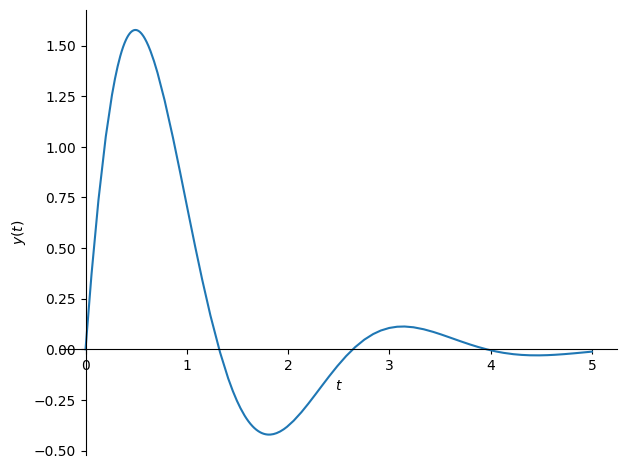

In [132]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [133]:
yext = y
yext.simplify()

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

In [134]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [135]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

       -t    ⎛√51⋅t⎞                 
7⋅√51⋅ℯ  ⋅sin⎜─────⎟                 
             ⎝  3  ⎠    -t    ⎛√51⋅t⎞
──────────────────── - ℯ  ⋅cos⎜─────⎟
         51                   ⎝  3  ⎠

In [136]:
y = yext + yint
y.simplify()

⎛         ⎛√51⋅t⎞             ⎞    
⎜9⋅√51⋅sin⎜─────⎟             ⎟    
⎜         ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜──────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝       17             ⎝  3  ⎠⎠    

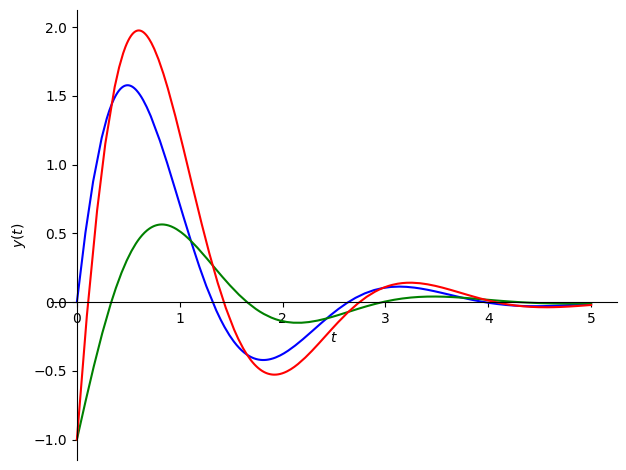

In [137]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

## ii) Escalón unitario

Condiciones iniciales cero

In [138]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t) # entrada escalón unitario en laplace es 1/s
y = y.simplify()
y

⎛            ⎛√51⋅t⎞             ⎞    
⎜     √51⋅sin⎜─────⎟             ⎟    
⎜ t          ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜ℯ  - ────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝           17            ⎝  3  ⎠⎠    

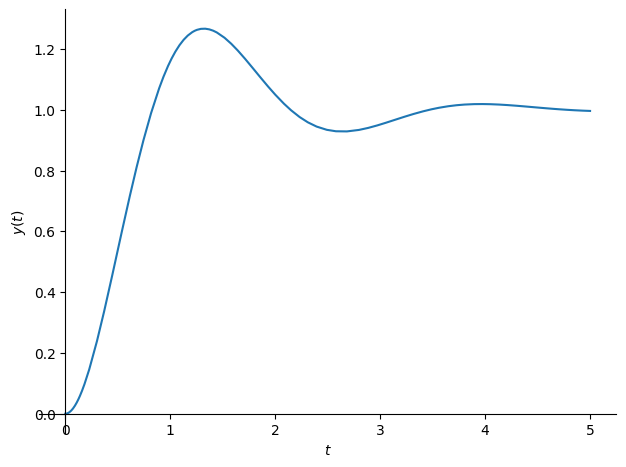

In [139]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [140]:
yext = y
yext.simplify()

⎛            ⎛√51⋅t⎞             ⎞    
⎜     √51⋅sin⎜─────⎟             ⎟    
⎜ t          ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜ℯ  - ────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝           17            ⎝  3  ⎠⎠    

In [141]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [142]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 2).subs(y0, 3), s, t)
yint

        -t    ⎛√51⋅t⎞                   
29⋅√51⋅ℯ  ⋅sin⎜─────⎟                   
              ⎝  3  ⎠      -t    ⎛√51⋅t⎞
───────────────────── + 3⋅ℯ  ⋅cos⎜─────⎟
          51                     ⎝  3  ⎠

In [143]:
y = yext + yint
y.simplify()

⎛               ⎛√51⋅t⎞               ⎞    
⎜     26⋅√51⋅sin⎜─────⎟               ⎟    
⎜ t             ⎝  3  ⎠        ⎛√51⋅t⎞⎟  -t
⎜ℯ  + ───────────────── + 2⋅cos⎜─────⎟⎟⋅ℯ  
⎝             51               ⎝  3  ⎠⎠    

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja)

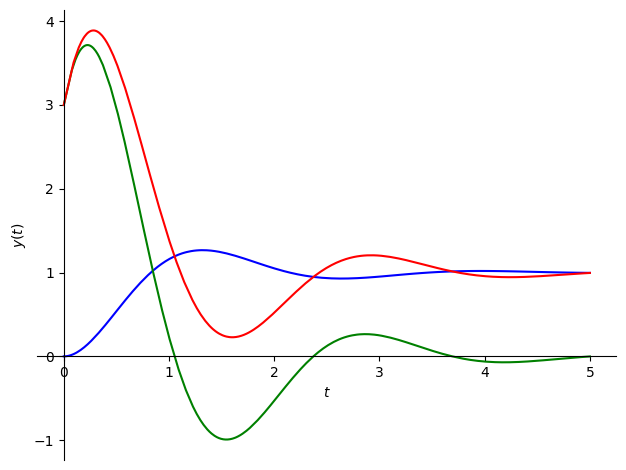

In [144]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

## iii) Rampa

Condiciones iniciales cero

In [145]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:2 , L: sym.Rational('.8'), C: sym.Rational('.8')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s**2), s, t) # entrada rampa en lapalce 1/s**2
y = y.simplify()

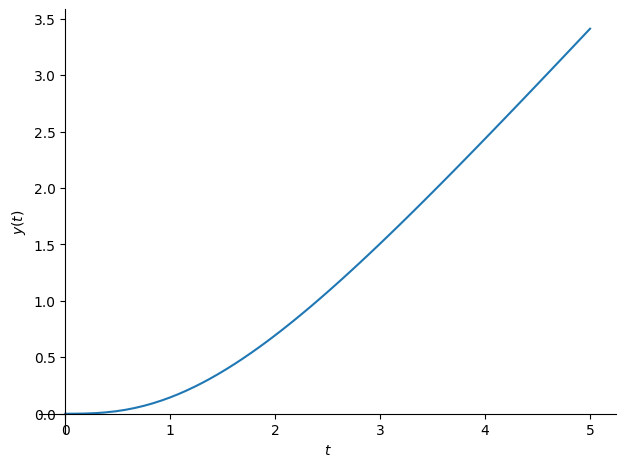

In [146]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [147]:
yext = y
yext.simplify()

                      -5⋅t 
       -5⋅t           ─────
       ─────            4  
         4     8   8⋅ℯ     
t + t⋅ℯ      - ─ + ────────
               5      5    

In [148]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [149]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, -1).subs(y0, 4), s, t)
yint

      -5⋅t            
      ─────      -5⋅t 
        4        ─────
15⋅t⋅ℯ             4  
─────────── + 4⋅ℯ     
     4                

In [150]:
y = yext + yint
y.simplify()

⎛                    5⋅t      ⎞  -5⋅t 
⎜                    ───      ⎟  ─────
⎜                     4       ⎟    4  
⎝95⋅t + 4⋅(5⋅t - 8)⋅ℯ    + 112⎠⋅ℯ     
──────────────────────────────────────
                  20                  

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja)

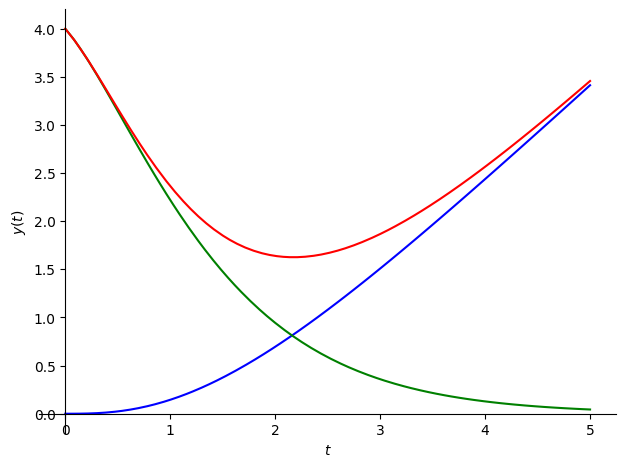

In [151]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

##**Circuito En Paralelo**

In [152]:
#@title Ingrese los valores para el circuito RLC en serie.

R=0.09 #@param {type:"number",min:0}
L=0.7 #@param {type:"number",min:0}
C=100 #@param {type:"number",min:0}

s=sym.symbols('s')

In [153]:
Wnp=1/np.sqrt(L*C)
md=(f'El valor de $\omega_n$ es: {Wnp:.2f}')

In [154]:
Kp=1/R
md=(f'El valor de $K$ es: {Kp:.2f}')

In [155]:
Xip=np.sqrt(L*C)/(2*R*C)
md=(f'El valor de $\Xi$ es: {Xip:.2f}')

In [156]:
Wdp=Wnp*np.sqrt(1-Xip**2)
md=(f'El valor de $\omega_d$ es: {Wdp:.2f}')

In [157]:
if Xip>1:
  print("El sistema es sobreamortiguado")
elif Xip<0:
  print("El sistema es inestable")
elif Xip==1:
  print("El sistema es criticamente amortiguado")
elif Xip==0:
  print("El sistema es oscilador")
else:
  print("El sistema es subamortiguado")

El sistema es subamortiguado


In [158]:
num=[0, 0, Wnp**2]
den=[1, 2*Wnp*Xip, Wnp**2]

Hs=signal.TransferFunction(num,den)

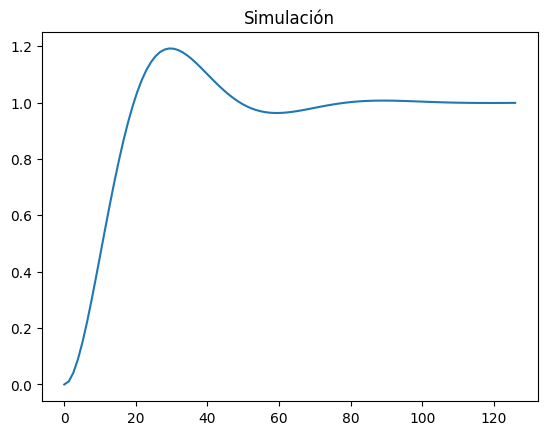

In [159]:
time, response=signal.step(Hs)

plt.plot(time,response)
plt.title("Simulación")
plt.show()